In [6]:
# Load tidyverse
library(tidyverse)

# Load and view the data
milk <- read.csv('state_milk_production.csv')

#add new column to work in millions for milk_produced column
milk <- milk %>%
  mutate(milk_million = milk_produced/1000000)

# Extract the data for 1970 only
milk1970 <- milk %>%
  filter(year == 1970)

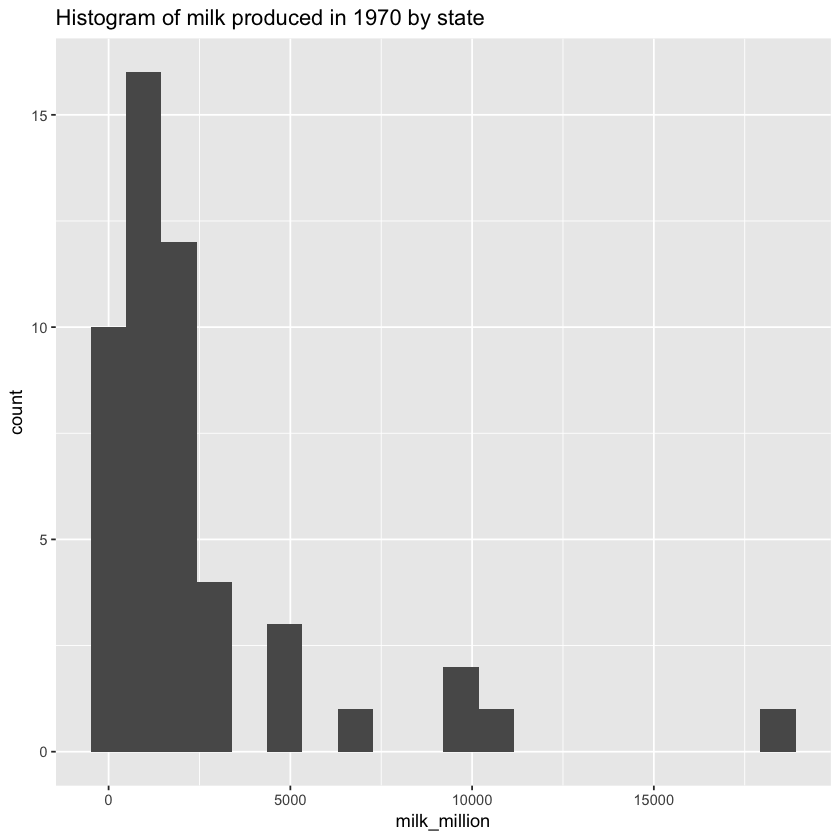

In [14]:
#looking at distribution of milk1970
ggplot(data = milk1970, aes(x = milk_million)) +
  geom_histogram(bins = 20) + 
  ggtitle('Histogram of milk produced in 1970 by state')

In [15]:
#identifying the state that produced over 15 billion pounds of milk
filter(milk1970,milk_million>15000)

region,state,year,milk_produced,milk_million
Lake States,Wisconsin,1970,1.8435e+10,18435


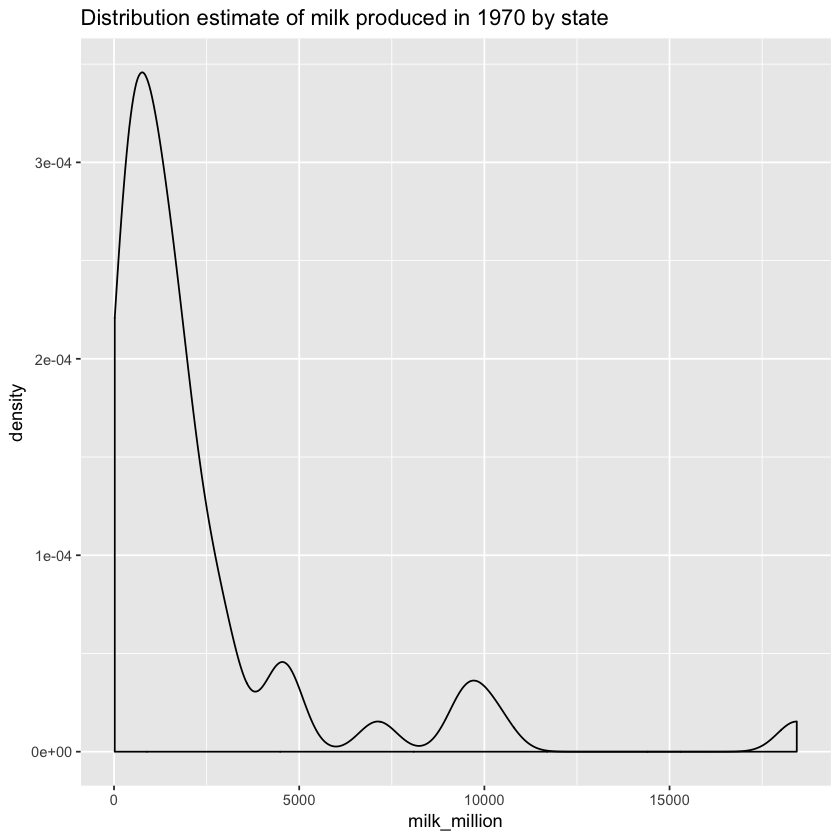

In [16]:
#probability density plot as opposed to histogram for milk1970 distribution 
ggplot(data = milk1970, aes(x = milk_million)) +
  geom_density() + 
  ggtitle('Distribution estimate of milk produced in 1970 by state')

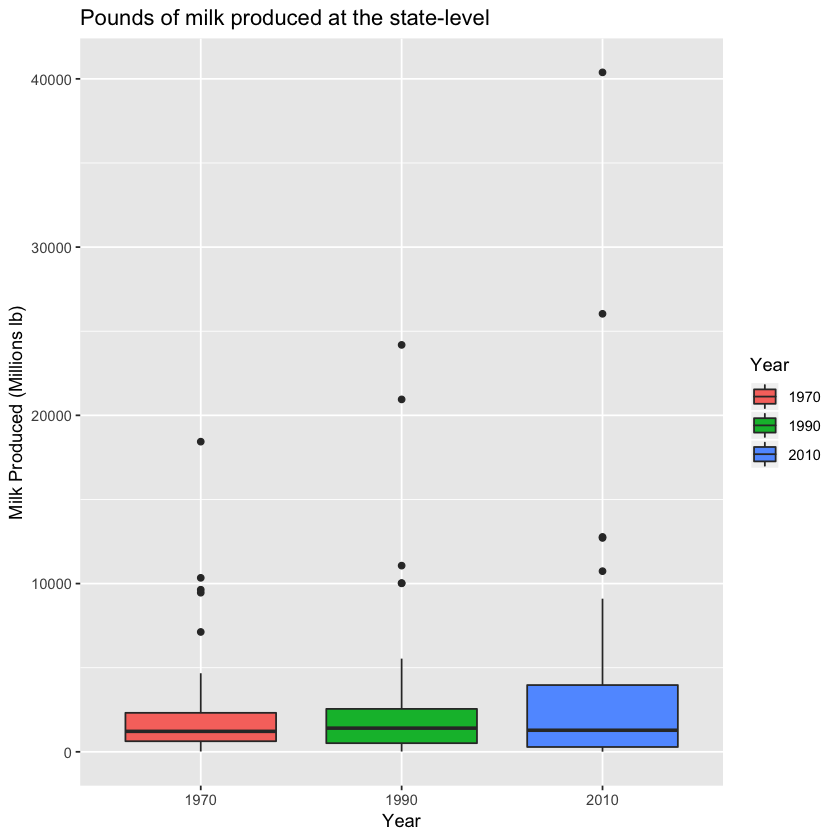

In [17]:
#Another kind of plot that is useful for comparing 
#univariate distributions across different groups are 
#boxplots. For example, we can filter the data for
#three years, say 1970, 1990, and 2010, to visualize
#how the distribution of milk procutions changes across those years.

# Extract data for the years 1970, 1990, and 2010
boxMilk <- milk %>%
  filter(year %in% c('1970','1990','2010'))

ggplot(data = boxMilk, aes(x = as.factor(year), y = milk_million, fill = as.factor(year))) +
  geom_boxplot() + 
  ggtitle('Pounds of milk produced at the state-level') + 
  scale_fill_discrete(name = 'Year') + 
  xlab('Year') +
  ylab('Milk Produced (Millions lb)')

In [18]:
#extracting medians from the boxplots above for each year
median_year <- boxMilk %>%
  group_by(year) %>%
  summarise(Med = median(milk_million)) %>%
  as_tibble()
median_year

year,Med
1970,1216.0
1990,1406.5
2010,1281.5


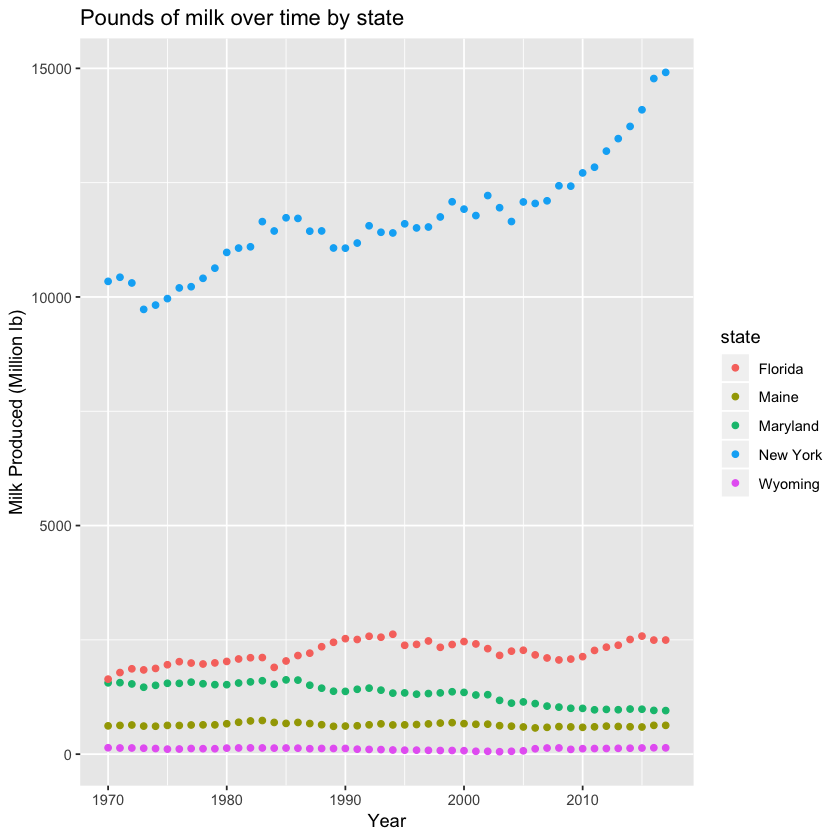

In [19]:
#looking at production over time by state

milksub <- milk %>%
  filter(state %in% c('New York','Wyoming','Maryland','Maine','Florida')) %>%
  select(state, year, milk_million)

ggplot(data = milksub, aes(x = year, y = milk_million, color = state)) +
  geom_point() + 
  ggtitle('Pounds of milk over time by state') +
  xlab('Year') +
  ylab('Milk Produced (Million lb)')

In [21]:
#correlations between year and milk production for the 5 states 
cor_sum <- milksub %>%
  group_by(state) %>%
  summarise(Correlation = cor(year,milk_million)) %>%
  as_tibble()
cor_sum

state,Correlation
Florida,0.6477052
Maine,-0.4039569
Maryland,-0.9336690
New York,0.9088291
Wyoming,-0.2445134


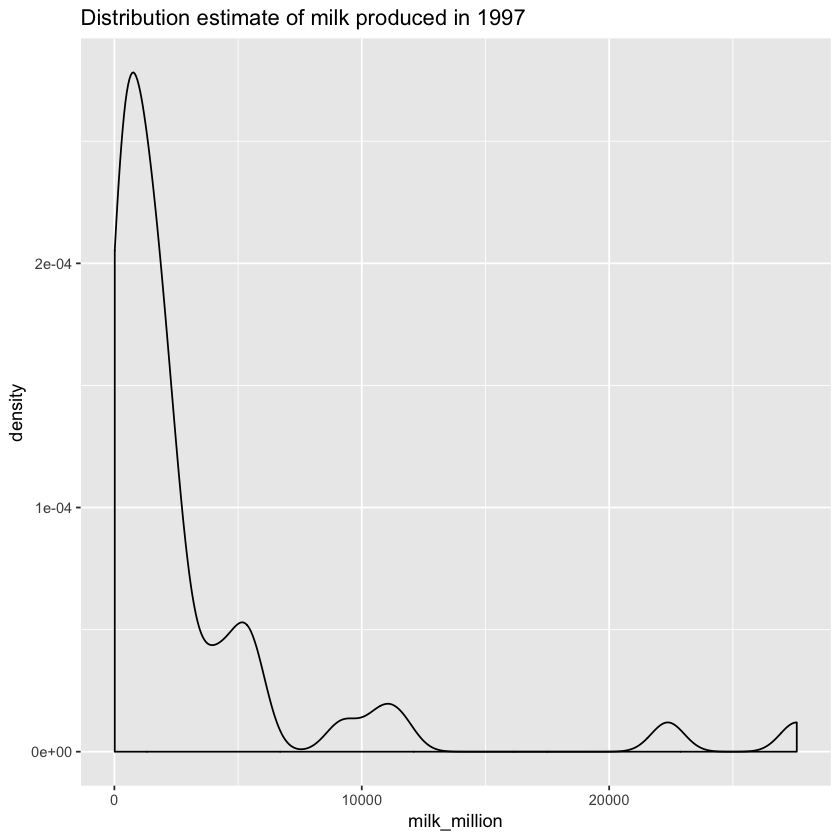

In [72]:
#Display the distribution of the yearly milk production (in millions of pounds) for 1997
milk1997 <- milk %>%
  filter(year == 1997)

ggplot(data = milk1997, aes(x = milk_million)) +
  geom_density() + 
  ggtitle('Distribution estimate of milk produced in 1997')

In [35]:
#Report the average milk produced by each state
milk1997 %>%
summarize(Average = mean(milk_million))

#Report the median milk produced be each state
milk1997 %>%
summarize(Median = median(milk_million))


Average
3121.82


Median
1436


In [39]:
#Report the state that produced the most milk
most = milk1997 %>% arrange(desc(milk_million))
most[1,]

region,state,year,milk_produced,milk_million
Pacific,California,1997,2.7582e+10,27582


In [38]:
#Report the state that produced the least amount of milk
least = milk1997 %>% arrange(milk_million)
least[1,]

region,state,year,milk_produced,milk_million
Pacific,Alaska,1997,1.5e+07,15


In [71]:
#Then using the whole dataset:
#The year when the most milk was produced in the United States.
m_year=milk %>% group_by(year) %>% summarize(Production=sum(milk_million)) %>% arrange(desc(Production))
m_year[1,]

#The year when the least milk was produced in the United States.
l_year=milk %>% group_by(year) %>% summarize(Production=sum(milk_million)) %>% arrange(Production)
l_year[1,]
#In 2017, report the 5 states that produced the most milk. (Hint: Use arrange)
m_states=milk %>% filter(year==2017) %>% arrange(desc(milk_million))
m_states[1:5,c(2,3,5)]

#In 2017, report the 5 states that produced the least milk. (Hint: Use arrange)
l_states=milk %>% filter(year==2017) %>% arrange(milk_million)
l_states[1:5,c(2,3,5)]


year,Production
2017,215466


year,Production
1975,115398


state,year,milk_million
California,2017,39798
Wisconsin,2017,30320
New York,2017,14912
Idaho,2017,14627
Texas,2017,12054


state,year,milk_million
Alaska,2017,3
Rhode Island,2017,13
Hawaii,2017,39
Arkansas,2017,79
Alabama,2017,89
